# Add 50% of null, duplicate and outliers at dataset

In [1]:
import os
import sys

# Ottieni la directory corrente (dove si trova il main_script.py)
current_directory = os.getcwd()

# Aggiungi la directory principale del progetto al sys.path
project_directory = os.path.abspath(os.path.join(current_directory, '..'))
if project_directory not in sys.path:
    sys.path.append(project_directory)

# Importa i moduli dalla directory principale
import ML_algorithms
import sanity_checks_methods
import pandas as pd

duplicates_directory = os.path.join(project_directory, 'duplicates')
if duplicates_directory not in sys.path:
    sys.path.append(duplicates_directory)

import duplicates_utils

duplicates_directory = os.path.join(project_directory, 'null_dataset')
if duplicates_directory not in sys.path:
    sys.path.append(duplicates_directory)

import null_utility

duplicates_directory = os.path.join(project_directory, 'outliers')
if duplicates_directory not in sys.path:
    sys.path.append(duplicates_directory)

import outliers_utils

dataset_path = os.path.join(project_directory, 'dataset/stroke_data.csv')
df = pd.read_csv(dataset_path)

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df = df.dropna()
df_original = df.copy()

df_original = sanity_checks_methods.drop_inconsistencies(df_original)
df = sanity_checks_methods.drop_inconsistencies(df)


## Dirty the most important feature

In [2]:
df = duplicates_utils.replace_duplicates_values(df, 50)
indices, original_values = null_utility.add_null_values(df,'avg_glucose_level', 50)
df = outliers_utils.outliers_replace(df, 'avg_glucose_level', 50)


 DECISION TREE PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.70      0.88      0.78      1441
           1       0.83      0.61      0.70      1413

    accuracy                           0.75      2854
   macro avg       0.77      0.74      0.74      2854
weighted avg       0.76      0.75      0.74      2854

Node Labels:
 Annotation(0.610243, 0.954545, 'hypertension <= 0.5\nsamples = 6658\nvalue = [3464, 3194]\nclass = 0')


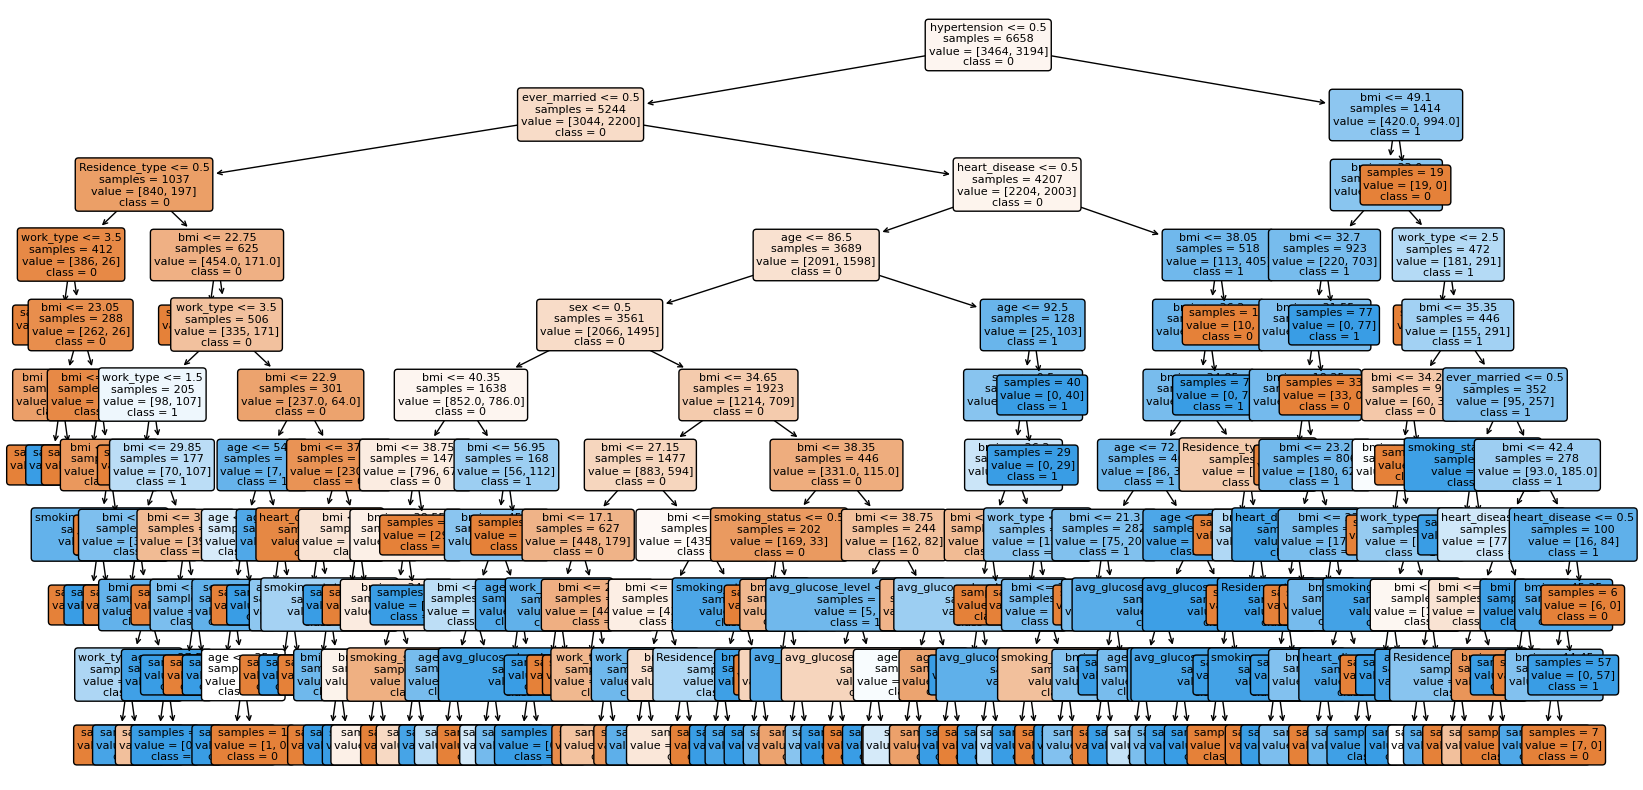

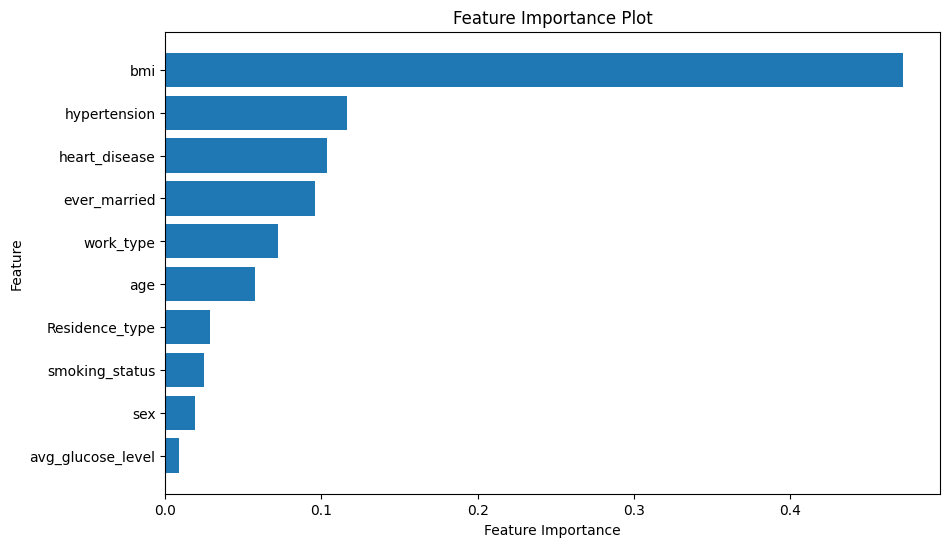

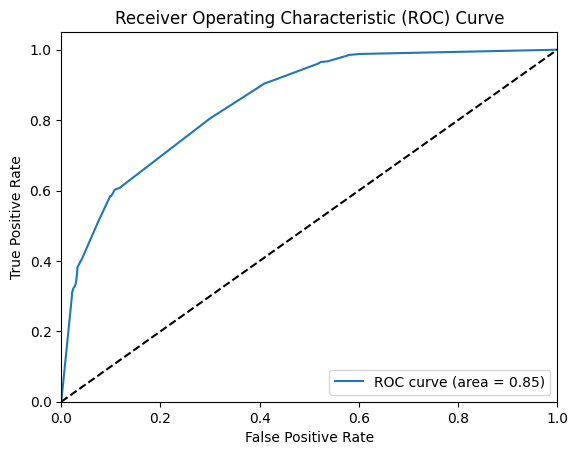

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.8512295120210713
Accuracy for each fold: [0.8076923076923077, 0.8461538461538461, 0.7587412587412588, 0.8111888111888111, 0.7684210526315789, 0.8035087719298246, 0.8210526315789474, 0.8140350877192982, 0.8315789473684211, 0.8245614035087719]
Mean accuracy: 0.8086934118513065
95% confidence interval: (0.7894520706216106, 0.8279347530810024)


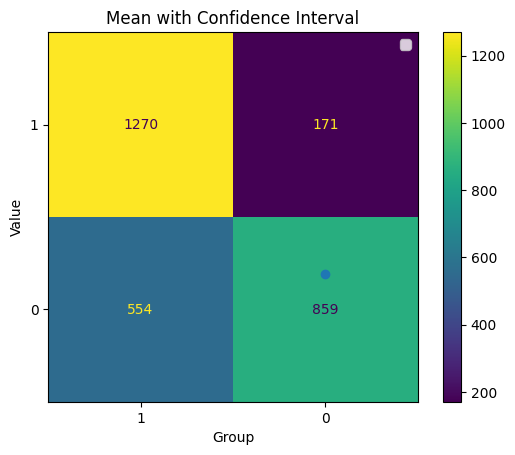


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.61      0.84      0.71      1441
           1       0.73      0.44      0.55      1413

    accuracy                           0.64      2854
   macro avg       0.67      0.64      0.63      2854
weighted avg       0.67      0.64      0.63      2854



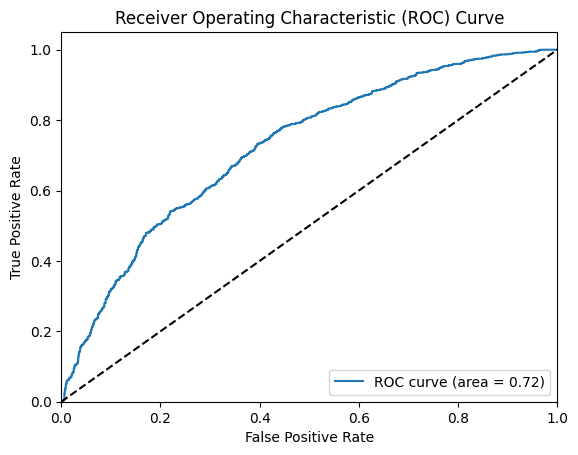

AUC Score: 0.7232729885523195


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6608391608391608, 0.6643356643356644, 0.6818181818181818, 0.6188811188811189, 0.6771929824561403, 0.6842105263157895, 0.6736842105263158, 0.6842105263157895, 0.6596491228070176, 0.5964912280701754]
Mean accuracy: 0.6601312722365354
95% confidence interval: (0.6389710413530382, 0.6812915031200327)


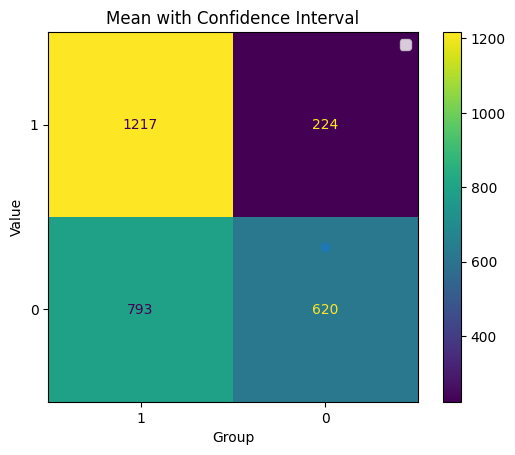

In [3]:
print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_dt, y_test_dt, decision_tree = ML_algorithms.model_dt(df, df_original)
mean_accuracy_dt, confidence_interval_dt = ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_original)
    
print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_svm, y_test_svm, svm = ML_algorithms.model_svm(df, df_original)
mean_accuracy_svm, confidence_interval_svm = ML_algorithms.k_fold_cross_validation_dt(svm,df_original) 
    
df.loc[indices, 'avg_glucose_level'] = original_values

## Conclusion

### ROC Curve 

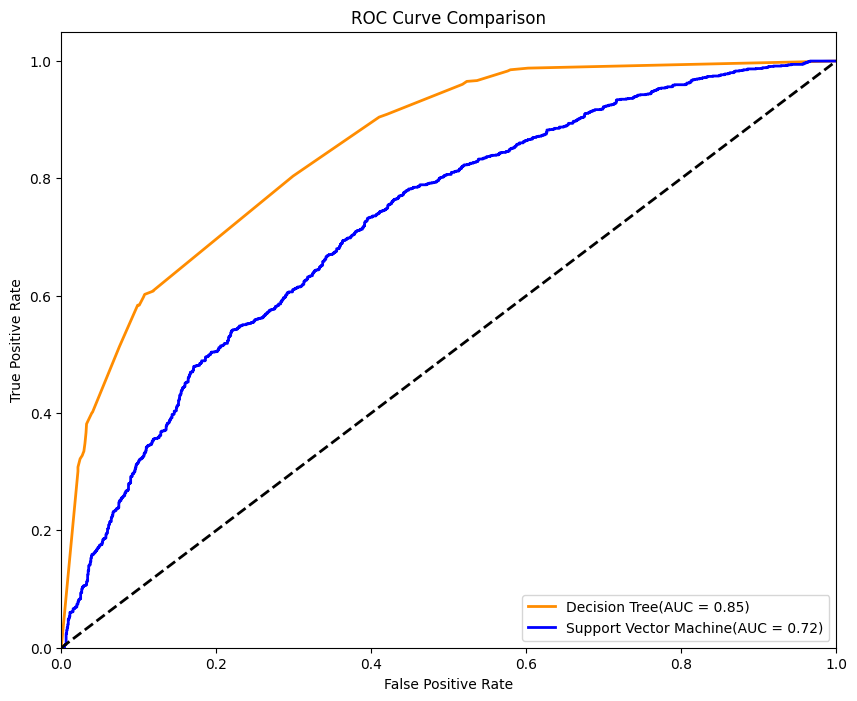

In [4]:
ML_algorithms.plot_roc_curve_conlusion(y_pred_prob_dt, y_test_dt, y_pred_prob_svm, y_test_svm)

### Confidence Interval 

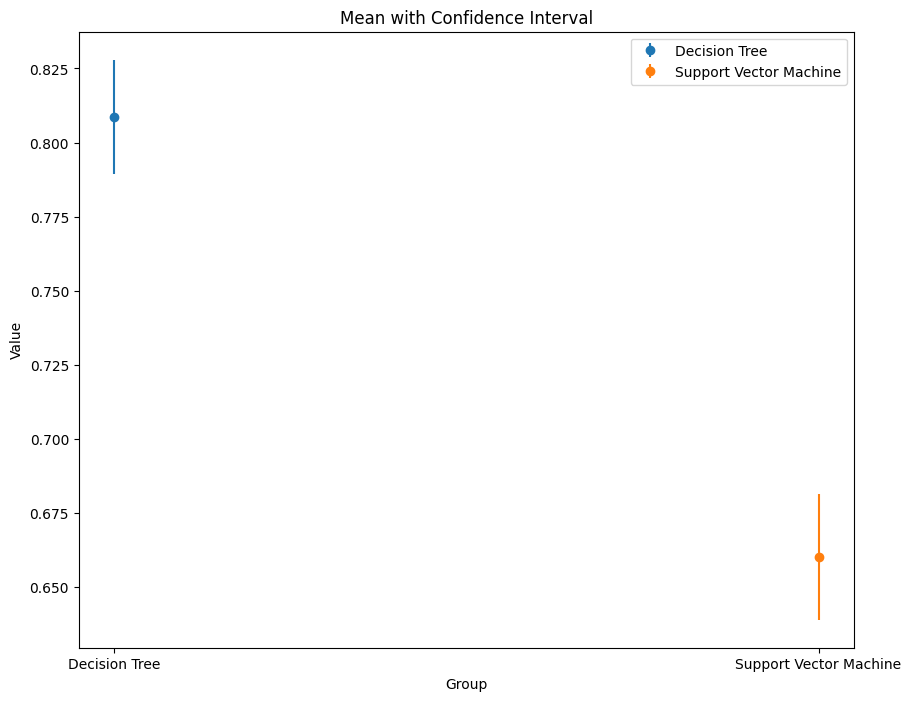

In [5]:
model_results = [
    ('Decision Tree', mean_accuracy_dt, confidence_interval_dt),
    ('Support Vector Machine', mean_accuracy_svm, confidence_interval_svm)
]
ML_algorithms.plot_confidence_intervals(model_results)